In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Aqui foram carregadas as bibliotecas utilizadas no projeto
# pandas e numpy para manipular os dados
#matplotlib e seaborn para os gráficos
# pickle para salvar o modelo depois
# sklearn pois contém tudo utilizado em ML

In [26]:
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)

Pandas: 2.2.3
NumPy: 1.26.4


In [27]:
df = pd.read_csv("/kaggle/input/indicium/desafio_indicium_imdb.csv")
df.head()

# carrego o csv com os dados dos filmes e rodo as primeiras cinco linhas para verificar

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [28]:
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)
df.head()

# a coluna Gross estava em formato de texto, foi transformada para float

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [29]:
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(float)
df.head()

# a coluna Runtime continha o argumento "min", que foi removido e também transformado em float

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [30]:
df = df.dropna(subset=["IMDB_Rating", "Meta_score", "Gross", "Runtime", "Genre"])
df.head()

# aqui foi somente removido os valores nulos das colunas acima, pois o modelo precisa de dados

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [31]:
encoders = {}
for col in ["Certificate", "Genre", "Director", "Star1", "Star2", "Star3", "Star4"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # treina e transforma no dataset original
    encoders[col] = le

df.head()

df["Certificate"].dtype

# como o modelo de ML não entende texto, então usamos o labelencoder para transformar em números

dtype('int64')

In [32]:
X = df[["Certificate", "Runtime", "Genre", "Meta_score", "Director",
        "Star1", "Star2", "Star3", "Star4", "No_of_Votes", "Gross"]]
y = df["IMDB_Rating"]

# separaçao em variáveis preditora X e alvo Y

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dividindo 80% em treino para ensinar o modelo e 20% em teste para avaliar o modelo

In [34]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# usamos aqui a Regressão, pois estamos tratando de números contínuos, no caso a nota no IMDb

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [35]:
y_pred = rf.predict(X_test)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# aqui se cria duas métricas, o erro médio entre previsão e o valor real, e o R2, que significa quanto o modelo explica dos dados

In [37]:
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.17
R²: 0.47


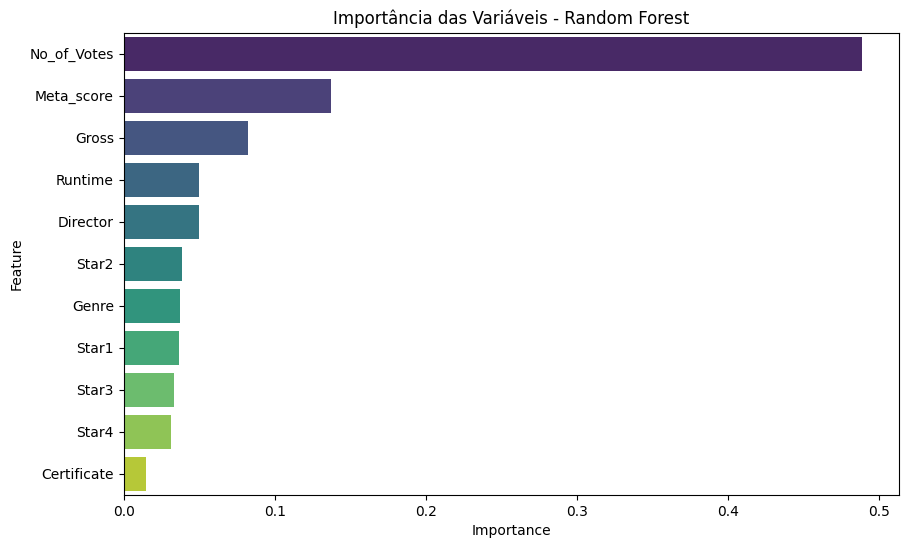

In [38]:
importances = rf.feature_importances_
feat_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importances, x="Importance", y="Feature", palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.show()

In [39]:
novo_filme = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': 1994,
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'
}

# esse são os dados do filme o qual queremos prever a nota

In [40]:
novo_filme["Runtime"] = float(novo_filme["Runtime"].replace(" min", ""))
novo_filme["Gross"] = float(novo_filme["Gross"].replace(",", ""))

for col in ["Certificate", "Genre", "Director", "Star1", "Star2", "Star3", "Star4"]:
    if novo_filme[col] in encoders[col].classes_:
        novo_filme[col] = encoders[col].transform([novo_filme[col]])[0]
    else:
        novo_filme[col] = -1

# converte os valores do novo filme para o mesmo formato do modelo de treino
# estava dando erro nessa parte, então foi utilizado -1 para desconhecido, caso apareca algum valor que não está no treino

In [41]:
X_novo = pd.DataFrame([[
    novo_filme["Certificate"], novo_filme["Runtime"], novo_filme["Genre"], novo_filme["Meta_score"],
    novo_filme["Director"], novo_filme["Star1"], novo_filme["Star2"], novo_filme["Star3"], novo_filme["Star4"],
    novo_filme["No_of_Votes"], novo_filme["Gross"]
]], columns=X.columns)

In [42]:
nota_prevista = rf.predict(X_novo)[0]
print(f"Nota prevista para '{novo_filme['Series_Title']}': {nota_prevista:.2f}")

# aqui temos a previsão da nota para o novo filme

Nota prevista para 'The Shawshank Redemption': 8.84


In [43]:
with open("modelo_imdb.pkl", "wb") as f:
    pickle.dump(rf, f)